In [1]:
import os
import cv2
import glob
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage import io
from skimage.color import rgb2gray
import imageio
import skimage
from scipy import ndimage
import pandas as pd
import matplotlib as mpl
from skimage import feature
from rembg import remove
from scipy import ndimage as ndi
from skimage.util import img_as_float
from skimage.filters import gabor_kernel
from skimage.filters import gabor
from numpy import asarray
import numpy as np
from PIL import Image, ImageDraw
import mediapipe as mp


In [2]:
def remove_bg(im):  
    image = Image.open(im)
    output = remove(image)
    return np.array(output)
    #output.show()

In [3]:
remove_1 = remove_bg('/Applications/DermaML/image007.jpg')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


hand_landmarks: landmark {
  x: 0.5573683
  y: -0.10327935
  z: 1.024566e-06
}
landmark {
  x: 0.41911605
  y: -0.026239961
  z: -0.04335897
}
landmark {
  x: 0.34715292
  y: 0.10834417
  z: -0.08266385
}
landmark {
  x: 0.29131064
  y: 0.25313717
  z: -0.11343975
}
landmark {
  x: 0.22148785
  y: 0.34364152
  z: -0.1469531
}
landmark {
  x: 0.41859344
  y: 0.2733075
  z: -0.11904967
}
landmark {
  x: 0.41232985
  y: 0.51042295
  z: -0.16889066
}
landmark {
  x: 0.41523546
  y: 0.65717363
  z: -0.19478196
}
landmark {
  x: 0.4196801
  y: 0.7753342
  z: -0.2116486
}
landmark {
  x: 0.5171985
  y: 0.2904752
  z: -0.12067778
}
landmark {
  x: 0.51354194
  y: 0.5497253
  z: -0.17500639
}
landmark {
  x: 0.51482993
  y: 0.7158104
  z: -0.2048142
}
landmark {
  x: 0.5174397
  y: 0.84379137
  z: -0.22373433
}
landmark {
  x: 0.6055735
  y: 0.27675825
  z: -0.11979718
}
landmark {
  x: 0.6164884
  y: 0.50873125
  z: -0.16423136
}
landmark {
  x: 0.6258652
  y: 0.66352177
  z: -0.19209707
}
lan

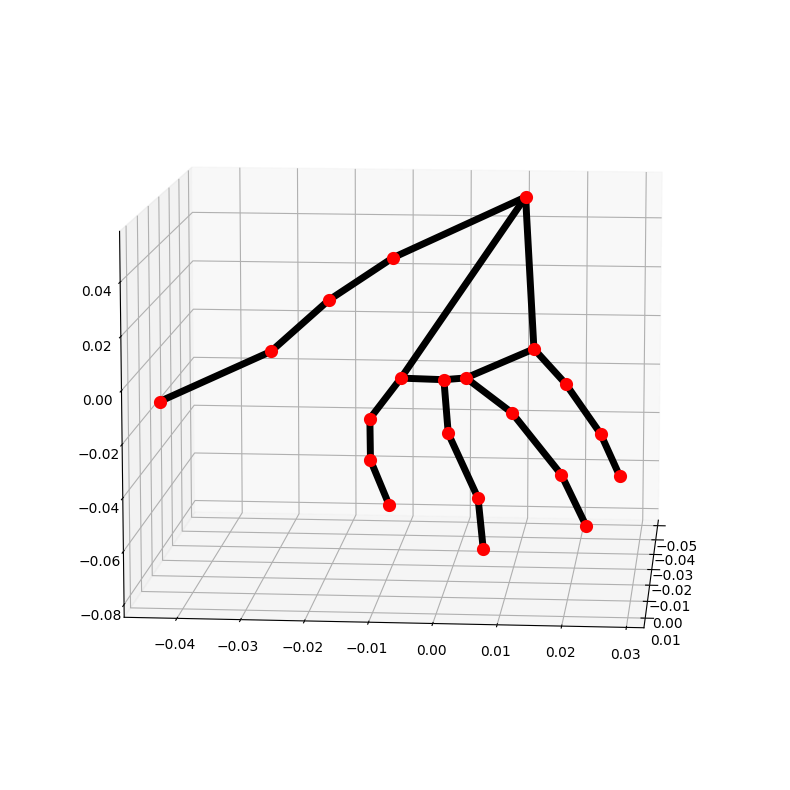

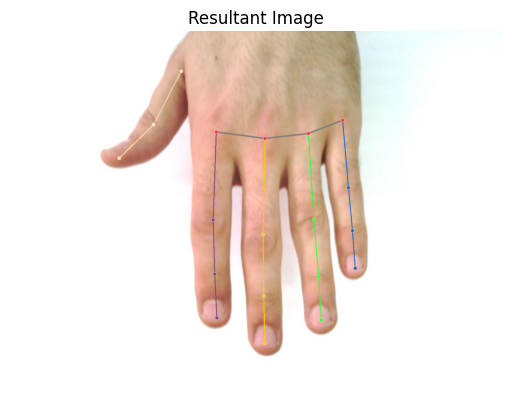

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# Path to your single image file
image_file = "/Applications/DermaML/src/dermaml/tests/Hand_0000002.jpg"

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:

    # Read the image file
    image = cv2.flip(cv2.imread(image_file), 1)
    
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if not results.multi_hand_landmarks:
        print("No hands detected in the image.")
    else:
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()
        
        for hand_landmarks in results.multi_hand_landmarks:
            print('hand_landmarks:', hand_landmarks)
        
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
        
        cv2.imwrite(
            '/tmp/annotated_image.png', cv2.flip(annotated_image, 1))
        
        # Draw hand world landmarks.
        if results.multi_hand_world_landmarks:
            for hand_world_landmarks in results.multi_hand_world_landmarks:
                mp_drawing.plot_landmarks(
                    hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

        plt.title("Resultant Image");plt.axis('off');plt.imshow(annotated_image[:,:,::-1]);plt.show()


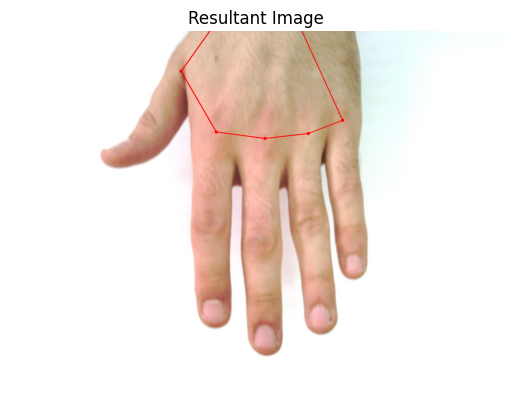

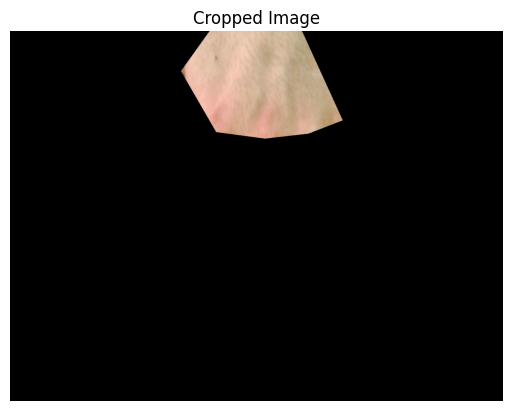

In [5]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Path to your single image file
image_file = "/Applications/DermaML/src/dermaml/tests/Hand_0000002.jpg"

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:

    # Read the image file
    image = cv2.flip(cv2.imread(image_file), 1)

    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.multi_hand_landmarks:
        print("No hands detected in the image.")
    else:
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()

        # Get the first detected hand (assuming only one hand is detected)
        hand_landmarks = results.multi_hand_landmarks[0]

        landmark_0 = (
            int(hand_landmarks.landmark[0].x * image_width),
            int(hand_landmarks.landmark[0].y * image_height)
        )

        landmark_1 = (
            int(hand_landmarks.landmark[1].x * image_width),
            int(hand_landmarks.landmark[1].y * image_height)
        )

        landmark_2 = (
            int(hand_landmarks.landmark[2].x * image_width),
            int(hand_landmarks.landmark[2].y * image_height)
        )

        landmark_5 = (
            int(hand_landmarks.landmark[5].x * image_width),
            int(hand_landmarks.landmark[5].y * image_height)
        )

        landmark_9 = (
            int(hand_landmarks.landmark[9].x * image_width),
            int(hand_landmarks.landmark[9].y * image_height)
        )

        landmark_13 = (
            int(hand_landmarks.landmark[13].x * image_width),
            int(hand_landmarks.landmark[13].y * image_height)
        )

        landmark_17 = (
            int(hand_landmarks.landmark[17].x * image_width),
            int(hand_landmarks.landmark[17].y * image_height)
        )

        # Draw circles for landmark 1 and landmark 2
        cv2.circle(annotated_image, landmark_0, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_1, 5, (0, 0, 255), -1)  
        cv2.circle(annotated_image, landmark_2, 5, (0, 0, 255), -1)
        cv2.circle(annotated_image, landmark_5, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_9, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_13, 5, (0, 0, 255), -1)  
        cv2.circle(annotated_image, landmark_17, 5, (0, 0, 255), -1)  

        landmark_coordinates = [landmark_0, landmark_1, landmark_2, landmark_5, landmark_9, landmark_13, landmark_17]

        for i in range(len(landmark_coordinates) - 1):
            cv2.line(annotated_image, landmark_coordinates[i], landmark_coordinates[i + 1], (0, 0, 255), 2)

        # Connect the last landmark to the first landmark to complete the loop
        cv2.line(annotated_image, landmark_coordinates[-1], landmark_coordinates[0], (0, 0, 255), 2)

        # Create a mask of the region within the loop
        mask = np.zeros_like(image)
        cv2.fillPoly(mask, [np.array(landmark_coordinates)], (255, 255, 255))

        # Apply the mask to the original image to crop the region
        cropped_image = cv2.bitwise_and(image, mask)

        # Save or display the image with landmarks
        # cv2.imwrite('/tmp/annotated_image.png', cv2.flip(annotated_image, 1))
        # cv2.imshow("Annotated Image", annotated_image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

        plt.title("Resultant Image");plt.axis('off');plt.imshow(annotated_image[:,:,::-1]);plt.show()
        plt.title("Cropped Image");plt.axis('off');plt.imshow(cropped_image[:,:,::-1]);plt.show()



In [73]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Path to your single image file
# image_file = "/Applications/DermaML/image007.jpg"

# image_file = np.array(remove_1)

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:

    # Read the image file
    # image = cv2.flip(cv2.imread(image_file), 1)

    image = np.array(remove_1)
    flipped_image = np.flip(image, axis=1)

    print(flipped_image.shape[2])

    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(flipped_image, cv2.COLOR_BGRA2RGBA))

    if not results.multi_hand_landmarks:
        print("No hands detected in the image.")
    else:
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()

        # Get the first detected hand (assuming only one hand is detected)
        hand_landmarks = results.multi_hand_landmarks[0]

        landmark_0 = (
            int(hand_landmarks.landmark[0].x * image_width),
            int(hand_landmarks.landmark[0].y * image_height)
        )

        landmark_1 = (
            int(hand_landmarks.landmark[1].x * image_width),
            int(hand_landmarks.landmark[1].y * image_height)
        )

        landmark_2 = (
            int(hand_landmarks.landmark[2].x * image_width),
            int(hand_landmarks.landmark[2].y * image_height)
        )

        landmark_5 = (
            int(hand_landmarks.landmark[5].x * image_width),
            int(hand_landmarks.landmark[5].y * image_height)
        )

        landmark_9 = (
            int(hand_landmarks.landmark[9].x * image_width),
            int(hand_landmarks.landmark[9].y * image_height)
        )

        landmark_13 = (
            int(hand_landmarks.landmark[13].x * image_width),
            int(hand_landmarks.landmark[13].y * image_height)
        )

        landmark_17 = (
            int(hand_landmarks.landmark[17].x * image_width),
            int(hand_landmarks.landmark[17].y * image_height)
        )

        # Draw circles for landmark 1 and landmark 2
        cv2.circle(annotated_image, landmark_0, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_1, 5, (0, 0, 255), -1)  
        cv2.circle(annotated_image, landmark_2, 5, (0, 0, 255), -1)
        cv2.circle(annotated_image, landmark_5, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_9, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_13, 5, (0, 0, 255), -1)  
        cv2.circle(annotated_image, landmark_17, 5, (0, 0, 255), -1)  

        landmark_coordinates = [landmark_0, landmark_1, landmark_2, landmark_5, landmark_9, landmark_13, landmark_17]

        for i in range(len(landmark_coordinates) - 1):
            cv2.line(annotated_image, landmark_coordinates[i], landmark_coordinates[i + 1], (0, 0, 255), 2)

        # Connect the last landmark to the first landmark to complete the loop
        cv2.line(annotated_image, landmark_coordinates[-1], landmark_coordinates[0], (0, 0, 255), 2)

        # Create a mask of the region within the loop
        mask = np.zeros_like(image)
        cv2.fillPoly(mask, [np.array(landmark_coordinates)], (255, 255, 255))

        # Apply the mask to the original image to crop the region
        cropped_image = cv2.bitwise_and(image, mask)

        # Save or display the image with landmarks
        # cv2.imwrite('/tmp/annotated_image.png', cv2.flip(annotated_image, 1))
        # cv2.imshow("Annotated Image", annotated_image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

        plt.title("Resultant Image");plt.axis('off');plt.imshow(annotated_image[:,:,::-1]);plt.show()
        plt.title("Cropped Image");plt.axis('off');plt.imshow(cropped_image[:,:,::-1]);plt.show()

4
No hands detected in the image.


In [11]:
# Convert image to a NumPy array
image_array = remove_1

# Define color to replace black pixels
replacement_color = (255, 0, 0, 255)  # Red color with full opacity (RGBA format)

# Define threshold for black
black_threshold = 0

# Find non-black pixels (pixels with all channels below the threshold)
non_black_pixels = np.all(image_array[:, :, :3] > black_threshold, axis=-1)

# Replace non-black pixels with the replacement color
image_array[non_black_pixels] = replacement_color

# Convert the modified NumPy array back to an image
final_image = Image.fromarray(image_array)

final_image.save("output_image.png")  # Replace with your desired output path
final_image.show()  # Display the image (optional)